In [1]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Combine all the code to form a single string
text = ""
for fname in os.listdir("C-code"):
    with open(os.path.join("C-code", fname), "r") as f:
        text += f.read() + "\n"

# Determine character level vocabulary with id mapping
vocab = set(text)
vocab_to_int = dict()
int_to_vocab = dict()
for i, c in enumerate(vocab):
    vocab_to_int[c] = i
    int_to_vocab[i] = c

# Replace each character in the text with its id
enc_text = [vocab_to_int[c] for c in text]

In [3]:
# Compute sliding window of 100 characters for input and output sequences
seq_length = 100
sequences = []
out_sequences = []
for i in range(0, len(enc_text), seq_length):
    sequences += [enc_text[i: i+seq_length]]
    out_sequences += [enc_text[i+1: i+seq_length+1]]

sequences = np.array(sequences[:-1], np.int32)
out_sequences = np.array(out_sequences[:-1], np.int32)


In [4]:
tf.reset_default_graph()
inputs = tf.placeholder(tf.int32, [None, seq_length])
targets = tf.placeholder(tf.int32, [None, seq_length])

In [5]:
# Two LSTM layers of 512 units each with 50% dropout
drop = 0.5
lstm1 = tf.contrib.rnn.BasicLSTMCell(512)
layer1 = tf.contrib.rnn.DropoutWrapper(lstm1, output_keep_prob=drop)

lstm2 = tf.contrib.rnn.BasicLSTMCell(512)
layer2 = tf.contrib.rnn.DropoutWrapper(lstm2, output_keep_prob=drop)

In [6]:
cell = tf.contrib.rnn.MultiRNNCell([layer1])

# Set initial hidden state to the zero state
initial_state = cell.zero_state(200, tf.float32) # batch_size = 200

# Convert the char ids in the input into one hot vectors
x_one_hot = tf.one_hot(inputs, len(vocab))

out, out_state = tf.nn.dynamic_rnn(cell, x_one_hot, initial_state=initial_state)

In [7]:
out_flat = tf.reshape(out, [-1, 512])

# Add a final dense layer
w = tf.Variable(tf.truncated_normal(shape=(512, len(vocab)), stddev=0.1))
b = tf.Variable(tf.zeros(len(vocab)))

logits = tf.add(tf.matmul(out_flat , w), b)
prob = tf.nn.softmax(logits)

In [8]:
y_one_hot = tf.one_hot(targets, len(vocab))
y_reshaped = tf.reshape(y_one_hot, logits.get_shape())

loss = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_reshaped)
loss = tf.reduce_mean(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [9]:
adam = tf.train.AdamOptimizer(0.0005)
train_step = adam.minimize(loss)

In [10]:
num_epochs = 50
bat_size = 200
curr = 0
losses = []
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(num_epochs):
    print("Epoch -", i+1, flush=True)
    curr = 0
    for _ in tqdm(range(int(len(sequences)/bat_size)-1)):
        inp = sequences[curr:curr+bat_size]
        tar = out_sequences[curr:curr+bat_size]
        feed_dict = {inputs:inp, targets:tar}
        l, s = sess.run([loss, train_step], feed_dict=feed_dict)
        losses.append(l)
        curr = curr + bat_size
    print('\nLoss: ', l, flush=True)

Epoch - 1


100%|██████████| 61/61 [00:48<00:00,  1.25it/s]


Loss:  3.7624867
Epoch - 2



100%|██████████| 61/61 [00:48<00:00,  1.28it/s]


Loss:  3.54785
Epoch - 3



100%|██████████| 61/61 [00:48<00:00,  1.23it/s]


Loss:  3.2957149
Epoch - 4



100%|██████████| 61/61 [00:48<00:00,  1.27it/s]


Loss:  3.0959308
Epoch - 5



100%|██████████| 61/61 [00:48<00:00,  1.28it/s]


Loss:  2.9045477
Epoch - 6



100%|██████████| 61/61 [00:49<00:00,  1.27it/s]


Loss:  2.7815008
Epoch - 7



100%|██████████| 61/61 [00:50<00:00,  1.26it/s]


Loss:  2.6966445
Epoch - 8



100%|██████████| 61/61 [00:49<00:00,  1.24it/s]


Loss:  2.6252282
Epoch - 9



100%|██████████| 61/61 [00:49<00:00,  1.19it/s]


Loss:  2.5640986
Epoch - 10



100%|██████████| 61/61 [00:49<00:00,  1.25it/s]


Loss:  2.520622
Epoch - 11



100%|██████████| 61/61 [00:49<00:00,  1.25it/s]


Loss:  2.4730308
Epoch - 12



100%|██████████| 61/61 [00:47<00:00,  1.28it/s]


Loss:  2.4303005
Epoch - 13



100%|██████████| 61/61 [00:47<00:00,  1.27it/s]


Loss:  2.3986132
Epoch - 14



100%|██████████| 61/61 [00:47<00:00,  1.24it/s]


Loss:  2.3693647
Epoch - 15



100%|██████████| 61/61 [00:52<00:00,  1.20it/s]


Loss:  2.3269148
Epoch - 16



100%|██████████| 61/61 [00:49<00:00,  1.25it/s]


Loss:  2.2993886
Epoch - 17



100%|██████████| 61/61 [00:48<00:00,  1.27it/s]


Loss:  2.2732627
Epoch - 18



100%|██████████| 61/61 [00:50<00:00,  1.08it/s]


Loss:  2.2437642
Epoch - 19



100%|██████████| 61/61 [00:49<00:00,  1.27it/s]


Loss:  2.212854
Epoch - 20



100%|██████████| 61/61 [00:49<00:00,  1.23it/s]


Loss:  2.1903868
Epoch - 21



100%|██████████| 61/61 [00:50<00:00,  1.25it/s]


Loss:  2.172591
Epoch - 22



100%|██████████| 61/61 [00:54<00:00,  1.10it/s]


Loss:  2.1541538
Epoch - 23



100%|██████████| 61/61 [00:50<00:00,  1.30it/s]


Loss:  2.1276324
Epoch - 24



100%|██████████| 61/61 [00:47<00:00,  1.24it/s]


Loss:  2.1033578
Epoch - 25



100%|██████████| 61/61 [00:50<00:00,  1.25it/s]


Loss:  2.084538
Epoch - 26



100%|██████████| 61/61 [00:49<00:00,  1.27it/s]


Loss:  2.0671391
Epoch - 27



100%|██████████| 61/61 [00:49<00:00,  1.21it/s]


Loss:  2.050407
Epoch - 28



100%|██████████| 61/61 [00:49<00:00,  1.27it/s]


Loss:  2.0369914
Epoch - 29



100%|██████████| 61/61 [00:47<00:00,  1.30it/s]


Loss:  2.0232425
Epoch - 30



100%|██████████| 61/61 [00:47<00:00,  1.25it/s]


Loss:  2.003684
Epoch - 31



100%|██████████| 61/61 [00:53<00:00,  1.28it/s]


Loss:  1.9810125
Epoch - 32



100%|██████████| 61/61 [00:48<00:00,  1.25it/s]


Loss:  1.959231
Epoch - 33



100%|██████████| 61/61 [00:48<00:00,  1.15it/s]


Loss:  1.9495697
Epoch - 34



100%|██████████| 61/61 [00:48<00:00,  1.29it/s]


Loss:  1.930386
Epoch - 35



100%|██████████| 61/61 [00:47<00:00,  1.27it/s]


Loss:  1.9103676
Epoch - 36



100%|██████████| 61/61 [00:49<00:00,  1.26it/s]


Loss:  1.9087489
Epoch - 37



100%|██████████| 61/61 [00:49<00:00,  1.32it/s]


Loss:  1.8943924
Epoch - 38



100%|██████████| 61/61 [00:50<00:00,  1.15it/s]


Loss:  1.8753732
Epoch - 39



100%|██████████| 61/61 [00:49<00:00,  1.30it/s]


Loss:  1.8632668
Epoch - 40



100%|██████████| 61/61 [00:52<00:00,  1.12it/s]


Loss:  1.8528386
Epoch - 41



100%|██████████| 61/61 [00:49<00:00,  1.09it/s]


Loss:  1.8416045
Epoch - 42



100%|██████████| 61/61 [00:49<00:00,  1.27it/s]


Loss:  1.8217458
Epoch - 43



100%|██████████| 61/61 [00:48<00:00,  1.21it/s]


Loss:  1.8063482
Epoch - 44



100%|██████████| 61/61 [00:51<00:00,  1.28it/s]


Loss:  1.7927234
Epoch - 45



100%|██████████| 61/61 [00:47<00:00,  1.25it/s]


Loss:  1.7784011
Epoch - 46



100%|██████████| 61/61 [00:47<00:00,  1.27it/s]


Loss:  1.7682222
Epoch - 47



100%|██████████| 61/61 [00:47<00:00,  1.28it/s]


Loss:  1.7560707
Epoch - 48



100%|██████████| 61/61 [00:48<00:00,  1.29it/s]


Loss:  1.7502875
Epoch - 49



100%|██████████| 61/61 [00:47<00:00,  1.21it/s]


Loss:  1.7345885
Epoch - 50



100%|██████████| 61/61 [00:48<00:00,  1.25it/s]


Loss:  1.7343229


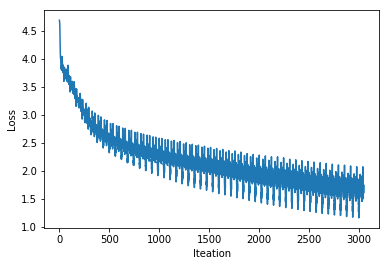

In [12]:
plt.plot(losses)
plt.xlabel("Iteation")
plt.ylabel("Loss")
plt.show()

In [15]:
seed = text[:100]
code = ''
enc = [enc_text[:100]]*200

code_len = 1000

for _ in tqdm(range(code_len)):
    p = sess.run([prob], feed_dict={inputs:enc})
    
    # Sampling from the output distribution. Let temperature = 1
    idx = np.random.choice(list(range(len(vocab))), p = p[0][-1])
    
    code += int_to_vocab[idx]
    enc[0] = enc[0][1:] + [idx]
    enc = [enc[0]]*200

print(seed+code)

100%|██████████| 1000/1000 [05:12<00:00,  3.33it/s]

#include <linux/compiler.h>
#include <linux/gcd.h>
#include <linux/export.h>
#include <linux/lcm.h>
#include <linux/ingo.b.h>
#include <linux/mupel.h>
#include <linux/sypv.rem"
#include <<inux/ecq_raitheofne_ules.ha
#include <linux/ini_n;

	ist_constybitcf_endens_start() confit a dried, dava, vor- intoms;
ino paiound_queue = asp_abdo_sy_fale_atrecute_socp(rdev->kbin_bist);
Crv1->for(eadmat |  axpx/>cengr0);

	ab_fmag(0, f2); });

	if (page->px_lusm_w + 1
		(stculs);
	ecmap = olk->d;

		com > gct_leadc->unxtalled;
	if (dev->pal <<inapezer)) {
		if (vmap))				info * SH;
			/* Dberak no state cole ant roag bhenfite home nutases me owo wa kernet /iicte to free it fimnranilby(bie mostryBsy
 * Tvca 132)
 */
nowateh pages tat ustrre out'tes_trak *nem. If the ma-aliok:
 thothe cglace soppertine
 * @llac_lis:
 */
#ifcufff"(UDIFVNU 1) v->wping)
{
	int err;

	ret	   acpi_ec_blecke(s, luntif);

	ord = 0;
	sbi_ctr(ec_vcl, incv->inf);
	}
	};
	s->inun_sect r e = dc_ios_ge(vic);
	int rbi_quely_mddev *